In [1]:
import math
import pandas as pd
import numpy as np
import hashlib as hl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/Users/narayani/Desktop/IIITB/Sem6/ML/ML_Project/Housing_Logistic Regression/data/D3.csv')

In [3]:
data.head()

,Unnamed: 0,1,2,3,4,5,6,7
0,0,0.195798,0.274106,-0.939997,0.028068,0.044240,0.013813,1
1,1,0.309739,0.264959,-0.913133,0.002043,0.006119,0.002161,1
2,2,0.264859,0.245184,-0.918893,0.112745,0.106892,0.035098,0
3,3,0.337062,0.320293,-0.885321,0.001099,0.002505,0.001011,1
4,4,0.351365,0.304930,-0.885185,0.001344,0.002241,0.001036,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 8 columns):
Unnamed: 0    2254 non-null int64
1             2254 non-null float64
2             2254 non-null float64
3             2254 non-null float64
4             2254 non-null float64
5             2254 non-null float64
6             2254 non-null float64
7             2254 non-null int64
dtypes: float64(6), int64(2)
memory usage: 140.9 KB


In [5]:
filter_data = data.drop(data.columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d4006d0>,
      dtype=object)

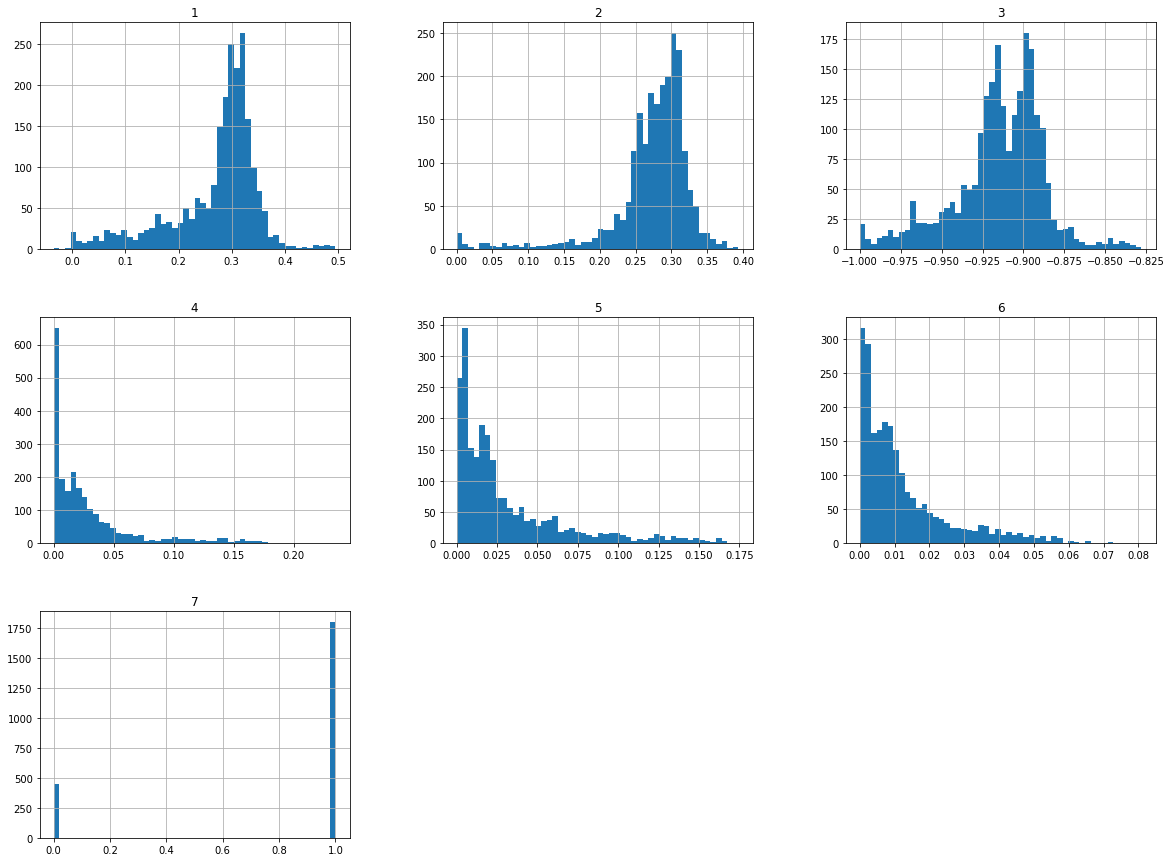

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
filter_data.hist(bins=50, figsize=(20,15))

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(filter_data, test_size=0.02, random_state = 20)

In [8]:
data1 = train_set.copy()

In [9]:
corr_matrix = data1.corr()

In [10]:
corr_matrix[filter_data.columns[6]].sort_values(ascending=False)

7    1.000000
2    0.118561
1    0.103949
3    0.006376
5   -0.410055
6   -0.420529
4   -0.426018
Name: 7, dtype: float64

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a0e4250>,
      dtype=object)

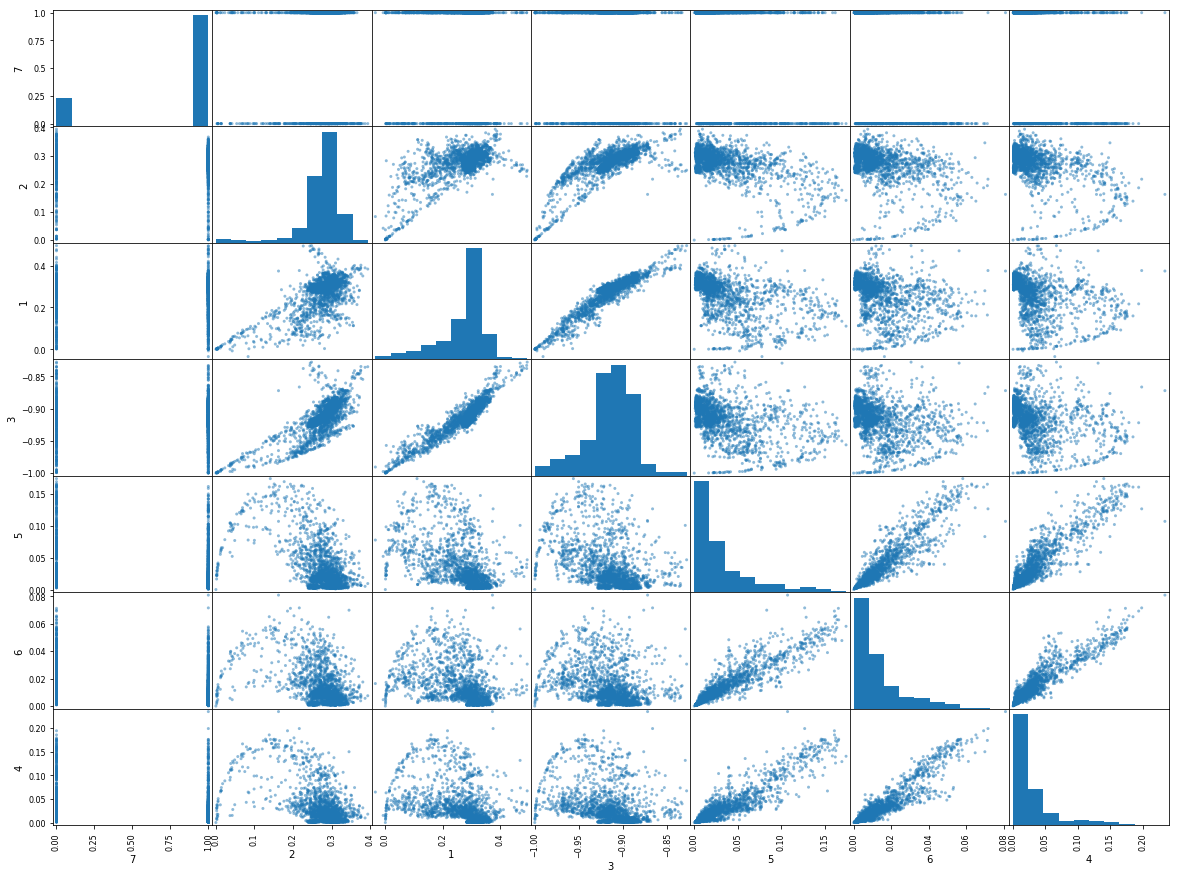

In [20]:
from pandas.tools.plotting import scatter_matrix

attributes = [ filter_data.columns[6],filter_data.columns[1],filter_data.columns[0],filter_data.columns[2],filter_data.columns[4],filter_data.columns[5],filter_data.columns[3]]
scatter_matrix(data1[attributes], figsize=(20, 15))

In [21]:
def compute_sigmoid(z):
    val=1.0/(1.0+math.exp(-1.0*z))
    return val

In [22]:
def compute_hypothesis(theta,x):
    pred=0.0
    for i in xrange(len(theta)):
        pred=pred+x[i]*theta[i]
#     print(pred)
    return compute_sigmoid(pred)

In [23]:
def compute_cost_func(X,Y,theta,m):
    sum_error=0
    for i in xrange(m):
        x = X[i]
        error=0
        h = compute_hypothesis(theta,x)
        if Y[i]==1:
            error=Y[i]*math.log(h)
        elif Y[i]==0:
            error=(1-Y[i])*math.log(1-h)
        sum_error=sum_error+error
    return (-1/m)*sum_error

In [24]:
def compute_cost_derivate(X,Y,theta,k,m):
    sum_error=0
    for i in xrange(m):
        x = X[i]
        x_k=x[k]
        h = compute_hypothesis(theta,x)
        #print(h)
        error=(h-Y[i])*x_k
        #print(error)
        sum_error=sum_error+error
    m=float(len(Y))
    #print((1/m)*sum_error)
    return (1/m)*sum_error

In [25]:
def gradient_descent(X,Y,theta,m,learning_rate):
    new_theta=[]
    for j in xrange(len(theta)):
        der=compute_cost_derivate(X,Y,theta,j,m)
        #print(der)
        new_theta_val_j=theta[j]-(learning_rate*der)
        new_theta.append(new_theta_val_j)
    return new_theta

In [26]:
def logistic_regression(X,Y,learning_rate,theta,number_iterations):
    m=len(Y)
    cost=0
    for i in xrange(number_iterations):
        new_theta=gradient_descent(X,Y,theta,m,learning_rate)
        #print(new_theta)
        theta=new_theta
        cost=compute_cost_func(X,Y,theta,m)
    return theta,cost 

In [27]:
training_data_gd = train_set.copy()
test_data_gd = test_set.copy()
# training_data_gd

In [28]:
training_data_gd_X = training_data_gd.drop(filter_data.columns[6], axis=1)
training_data_gd_X.insert(6,'Ones',1)
training_data_gd_Y=training_data_gd['7']

X=training_data_gd_X.as_matrix()
Y=np.array(training_data_gd_Y).flatten()

In [29]:
learning_rate=0.01
number_iterations=1500
theta_initial=[0.0]*X.shape[1]
print(theta_initial)
theta,cost=logistic_regression(X,Y,learning_rate,theta_initial,number_iterations)
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


[0.2346639702400012,
 0.22579818972042534,
 -0.6244481499076434,
 -0.07520047199332255,
 -0.06456715430605516,
 -0.02466127458558141,
 0.683266201874662]

In [30]:
train_set_y_pred=[]
for i in X:
    pred=compute_hypothesis(theta,i)
    if(pred>=0.75):
        val=1
    else:
        val=0
    train_set_y_pred.append(val)
# train_set_y_pred

In [31]:
# for i in range(len(train_set_y_pred)):
#     print(train_set_y_pred[i],Y[i])

In [32]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(train_set_y_pred,Y)
rmse=np.sqrt(mse)
print ("Mean square error (Training data): ")
print (mse)
print ("Root mean square error (Training data):")
print (rmse)

Mean square error (Training data): 
0.20108695652173914
Root mean square error (Training data):
0.44842720314644063


In [33]:
test_data_gd_X = test_data_gd.drop(filter_data.columns[6], axis=1)
test_data_gd_X.insert(6,'Ones',1)
test_data_gd_Y=test_data_gd['7']

X=test_data_gd_X.as_matrix()
Y=np.array(test_data_gd_Y).flatten()

In [34]:
learning_rate=0.01
number_iterations=1500
theta_initial=[0.0]*X.shape[1]
print(theta_initial)
theta,cost=logistic_regression(X,Y,learning_rate,theta_initial,number_iterations)
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


[0.12019557970634635,
 0.17768769011158558,
 -0.7550152854474537,
 -0.057122095014313125,
 -0.00349514429475926,
 -0.01887094536014677,
 0.774557174579099]

In [35]:
y_pred_prob=[]
test_set_y_pred=[]
for i in X:
    pred=compute_hypothesis(theta,i)
    if(pred>=0.5):
        y_pred_prob.append(pred)
        val=1
    else:
        y_pred_prob.append(1-pred)
        val=0
    test_set_y_pred.append(val)

In [36]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_set_y_pred,Y)
rmse=np.sqrt(mse)
print ("Mean square error (Testing data): ")
print (mse)
print ("Root mean square error (Testing data):")
print (rmse)

Mean square error (Testing data): 
0.17391304347826086
Root mean square error (Testing data):
0.41702882811414954


In [37]:
def getAccuracy(actual, predictions):
	correct = 0
	for x in range(len(actual)):
		if actual[x] == predictions[x]:
			correct += 1
	return (correct/float(len(actual)))

In [38]:
accuracy = getAccuracy(Y,test_set_y_pred)

In [39]:
print ("Accuracy = " +str(accuracy))

Accuracy = 0.826086956522


In [31]:
from sklearn import metrics
confusion = metrics.confusion_matrix(Y,test_set_y_pred)
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [32]:
# Precision tells us that when a positive value is predicted, how often is the prediction incorrect
precision = (TP) / float(TP + FP)
print ("Precision = " + str(precision))

Precision = 0.8260869565217391


In [40]:
#recall(also known as sensitivity or true positive rate) tells us that when the actual value is positive, how often is the prediction correct.
recall = (TP) / float(TP + FN)
print ("Recall = " + str(recall))

NameError: name 'TP' is not defined

In [34]:
#F-measure(also known as F1-score or balanced F-score) is a measure of a test's accuracy. It considers both the precision and the recall of the test to compute the score.
#F-measure = 2*(precision*recall)/(precision+recall)
f_measure = 2* (precision*recall)/float((precision+recall))
print ("F-measure = " + str(f_measure))

F-measure = 0.9047619047619047


In [35]:
#AUC is the percentage of the ROC plot that is underneath the curve. AUC is useful as a single number summary of classifier performance 
auc = metrics.roc_auc_score(Y,y_pred_prob)

In [36]:
print ("AUC = " + str(auc))

AUC = 0.8157894736842105
